In [1]:
pip install numpy scikit-learn gym matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
     -------------- ------------------------- 262.1/721.7 kB ? eta -:--:--
     -------------- ------------------------- 262.1/721.7 kB ? eta -:--:--
     -------------- ------------------------- 262.1/721.7 kB ? eta -:--:--
     -------------------------- --------- 524.3/721.7 kB 465.6 kB/s eta 0:00:01
     -------------------------- --------- 524.3/721.7 kB 465.6 kB/s eta 0:00:01
     ------------------------------------ 721.7/721.7 kB 452.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished 

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = np.array([[2000, 3, 1], [1500, 2, 2], [1800, 3, 3], [1200, 2, 1], [2200, 4, 2]])
y = np.array([500000, 350000, 450000, 300000, 550000])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 625000000.0


In [9]:
from sklearn.cluster import KMeans
import numpy as np

# Sample customer data: number of purchases, total spending, product categories purchased
X = np.array([[5, 1000, 2], [10, 5000, 5], [2, 500, 1], [8, 3000, 3], [12, 6000, 6]])

In [17]:
# Create and fit the KMeans model
from sklearn.cluster import KMeans

# Explicitly using n_init=10 to maintain current behavior
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)


# Print the cluster centers and labels
print(f"Cluster Centers: {kmeans.cluster_centers_}")
print(f"Labels: {kmeans.labels_}")

Cluster Centers: [[5.0e+00 1.5e+03 2.0e+00]
 [1.1e+01 5.5e+03 5.5e+00]]
Labels: [0 1 0 0 1]


Text(0.5, 1.0, 'Customer Segmentation using K-Means Clustering')

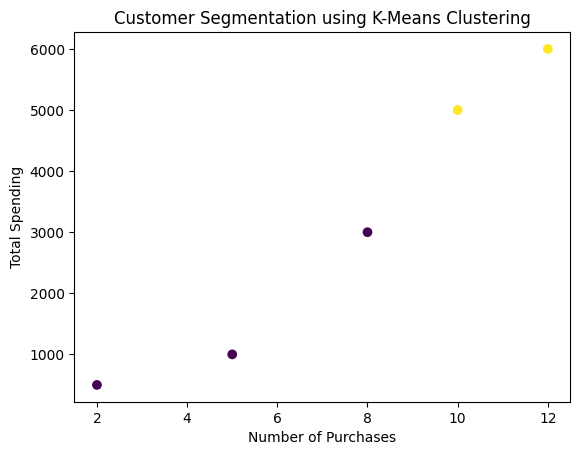

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spending')
plt.title('Customer Segmentation using K-Means Clustering')

In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Initialize the Q-table
Q = {}

# Define the Tic-Tac-Toe board
def initialize_board():
    return np.zeros((3, 3), dtype=int)

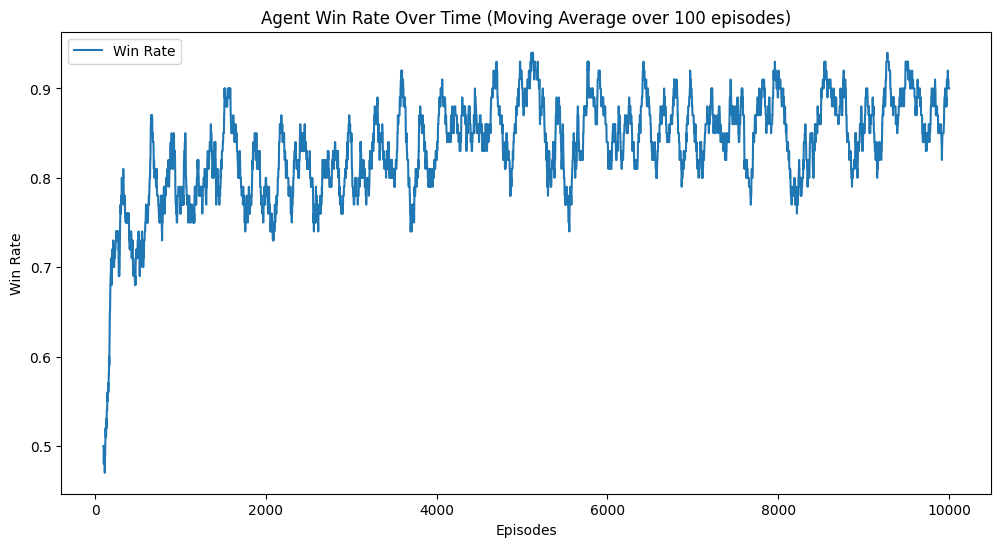

In [23]:
# Check for a win
def check_win(board, player):
    for i in range(3):
        if np.all(board[i, :] == player) or np.all(board[:, i] == player):
            return True
    if board[0, 0] == board[1, 1] == board[2, 2] == player or board[0, 2] == board[1, 1] == board[2, 0] == player:
        return True
    return False

# Check for a draw
def check_draw(board):
    return not np.any(board == 0)

# Get available actions
def get_available_actions(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i, j] == 0]

# Choose an action using epsilon-greedy policy
def choose_action(state, board, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(get_available_actions(board))
    else:
        if state in Q and Q[state]:
            # Choose the action with the maximum Q-value
            return max(Q[state], key=Q[state].get)
        else:
            # No action in Q-table, choose random
            return random.choice(get_available_actions(board))

# Update Q-value
def update_q_value(state, action, reward, next_state, alpha, gamma):
    max_future_q = max(Q.get(next_state, {}).values(), default=0)
    current_q = Q.get(state, {}).get(action, 0)
    new_q = current_q + alpha * (reward + gamma * max_future_q - current_q)
    if state not in Q:
        Q[state] = {}
    Q[state][action] = new_q

# Convert board to a tuple (hashable type)
def board_to_tuple(board):
    return tuple(map(tuple, board))

# Train the agent
def train(episodes, alpha=0.1, gamma=0.9, epsilon=0.1):
    win_history = []
    for episode in range(episodes):
        board = initialize_board()
        state = board_to_tuple(board)
        done = False
        result = None  # Initialize result
        while not done:
            action = choose_action(state, board, epsilon)
            board[action[0], action[1]] = 1
            next_state = board_to_tuple(board)
            if check_win(board, 1):
                update_q_value(state, action, 1, next_state, alpha, gamma)
                result = 1  # Agent won
                done = True
            elif check_draw(board):
                update_q_value(state, action, 0.5, next_state, alpha, gamma)
                result = 0  # Draw
                done = True
            else:
                opponent_action = random.choice(get_available_actions(board))
                board[opponent_action[0], opponent_action[1]] = -1
                next_state = board_to_tuple(board)
                if check_win(board, -1):
                    update_q_value(state, action, -1, next_state, alpha, gamma)
                    result = -1  # Agent lost
                    done = True
                elif check_draw(board):
                    update_q_value(state, action, 0.5, next_state, alpha, gamma)
                    result = 0  # Draw
                    done = True
                else:
                    update_q_value(state, action, 0, next_state, alpha, gamma)
            state = next_state
        # Record the result
        if result == 1:
            win_history.append(1)
        else:
            win_history.append(0)
    return win_history

# Train the agent for 10000 episodes
win_history = train(10000)

# Calculate the moving average of win rate
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

# Set the window size for the moving average
window_size = 100

# Compute the moving average
win_rate = moving_average(win_history, window_size)

# Generate episodes for plotting
episodes = np.arange(window_size, len(win_history) + 1)

# Plot the win rate over time
plt.figure(figsize=(12,6))
plt.plot(episodes, win_rate, label='Win Rate')
plt.xlabel('Episodes')
plt.ylabel('Win Rate')
plt.title('Agent Win Rate Over Time (Moving Average over {} episodes)'.format(window_size))
plt.legend()
plt.show()